In [670]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [671]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: overall approach of the analysis.Mention the problem statement and the analysis approach briefly.

## Problem Statement:
- This case study aims to identify patterns which indicate if a client has difficulty paying their installments 
- which may be used for taking actions such as denying the loan, reducing the amount of loan, lending 
- (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of 
- repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

- In other words, the company wants to understand the driving factors (or driver variables) behind loan default, 
- i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its 
- portfolio and risk assessment.


## Approach: 
- 1. Read the dataset
- 2. Clean the dataset(Drop unwanted ros and columns, check data type,)
- 3. Identify the outliers
- 4. Analysis the DF_APP_DATA and get the insight from the analysis of categorical variable and numeric variable by ploting required plots(univariate and Bivariate)
- 5. Analysis the DF_PREV_APP and get the insight from the analysis of categorical variable and numeric variable by ploting required plots(univariate and Bivariate) 
- 6. Merge both the data set and analyse the impact of previous application data on the Current application by checking it against TARGET variable.
- 7. Find the major factors for Bank which can help in Credit risk analysis.  

# Task 1

# Read the data files for Previous Application and current Application

In [672]:
# Read the data files
DF_PREV_APP = pd.read_csv('previous_application.csv')
DF_APP_DATA = pd.read_csv('application_data.csv')


DF_APP_DATA.head()
print(DF_APP_DATA.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


# Task 2: Identify the missing data and use appropriate method to deal with it

### 2.1 Data Cleaning for Rows

In [673]:
# 1. Duplicate rows: Check and Drop the duplicate rows if any (There are no Duplicate rows)
DF_APP_DATA_update = DF_APP_DATA.drop_duplicates(subset = None, keep = 'first', inplace = False)
DF_APP_DATA.shape
DF_APP_DATA_update.shape

DF_PREV_APP_update = DF_PREV_APP.drop_duplicates(subset = None, keep = 'first', inplace = False)
DF_PREV_APP.shape
DF_PREV_APP_update.shape

# 2. Check for rows having all missing values
print(DF_APP_DATA.isnull().all(axis=1).sum())
print(DF_PREV_APP.isnull().all(axis=1).sum())

#3 :Delete rows with more than 50 percent missing values
DF_APP_DATA.drop(DF_APP_DATA[(DF_APP_DATA.isnull().sum(axis =1) > len(list(DF_APP_DATA.columns))//2)].index, axis = 0,inplace =True)
DF_PREV_APP.drop(DF_PREV_APP[(DF_PREV_APP.isnull().sum(axis =1) > len(list(DF_PREV_APP.columns))//2)].index, axis = 0,inplace =True)

DF_APP_DATA.shape

0
0


(307511, 122)

## 2.2 Data Cleaning for Columns

In [674]:
# 1. Delete columns with more than 50 percent missing values
DF_APP_DATA.dropna(thresh = int(len(DF_APP_DATA)*0.5), axis = 1,inplace = True)
DF_APP_DATA.shape
DF_APP_DATA.columns

DF_PREV_APP.dropna(thresh = int(len(DF_PREV_APP)*0.5), axis = 1,inplace = True)


# 2  Lets merge the columns for documents provided and enquiries made to Bureau and create single column for each
print(DF_APP_DATA.columns.get_loc("FLAG_DOCUMENT_2"))
print(DF_APP_DATA.columns.get_loc("FLAG_DOCUMENT_21"))
print(DF_APP_DATA.columns.get_loc("AMT_REQ_CREDIT_BUREAU_HOUR"))
print(DF_APP_DATA.columns.get_loc("AMT_REQ_CREDIT_BUREAU_YEAR"))

DF_APP_DATA['Total_docs'] = DF_APP_DATA.iloc[:,55:74].sum(axis = 1)  # getting total documents submitted.
DF_APP_DATA['Total_enq'] = DF_APP_DATA.iloc[:,75:80].sum(axis = 1)  # getting total no. of enquiries.

# As new merged single columns Total_docs/Total_enq are formed lets drop these cols from FLAG_DOCUMENT_2:AMT_REQ_CREDIT_BUREAU_YEAR
DF_APP_DATA.drop(DF_APP_DATA.iloc[:,55:81],inplace = True, axis =1)  

print(DF_APP_DATA.columns)

DF_APP_DATA.drop(DF_APP_DATA.loc[:,'YEARS_BEGINEXPLUATATION_AVG':'TOTALAREA_MODE'],inplace = True, axis =1)  

# 3  Standardise precision : Round off all float columns to two decimal places
colsToRoundOff = DF_APP_DATA.select_dtypes(include=['float16','float32','float64']).columns  # only float columns
DF_APP_DATA[colsToRoundOff] = DF_APP_DATA[colsToRoundOff].apply(lambda x: round(x, 2))

# Check if the columns has been rounded off
DF_APP_DATA.loc[:4, colsToRoundOff]

DF_APP_DATA.shape

55
74
75
80
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_

(307511, 50)

In [675]:
# Data type Change

#removing negative sign DF_APP_DATA
DF_APP_DATA['DAYS_BIRTH'] = abs(DF_APP_DATA['DAYS_BIRTH']) 
DF_APP_DATA['DAYS_LAST_PHONE_CHANGE'] = abs(DF_APP_DATA['DAYS_LAST_PHONE_CHANGE'])
DF_APP_DATA['DAYS_EMPLOYED'] = abs(DF_APP_DATA['DAYS_EMPLOYED']) 
DF_APP_DATA['DAYS_REGISTRATION'] = abs(DF_APP_DATA['DAYS_REGISTRATION']) 
DF_APP_DATA['DAYS_ID_PUBLISH'] = abs(DF_APP_DATA['DAYS_ID_PUBLISH']) 

#removing negative sign
DF_PREV_APP['DAYS_DECISION'] = abs(DF_PREV_APP['DAYS_DECISION']) 
DF_PREV_APP['SELLERPLACE_AREA'] = abs(DF_PREV_APP['SELLERPLACE_AREA'])
DF_PREV_APP['DAYS_FIRST_DUE'] = abs(DF_PREV_APP['DAYS_FIRST_DUE'])
DF_PREV_APP['DAYS_LAST_DUE'] = abs(DF_PREV_APP['DAYS_LAST_DUE'])
DF_PREV_APP['DAYS_TERMINATION'] = abs(DF_PREV_APP['DAYS_TERMINATION'])


# Task 3: Identify if there are outliers in the dataset. 
 
### Also, mention why do you think it is an outlier.

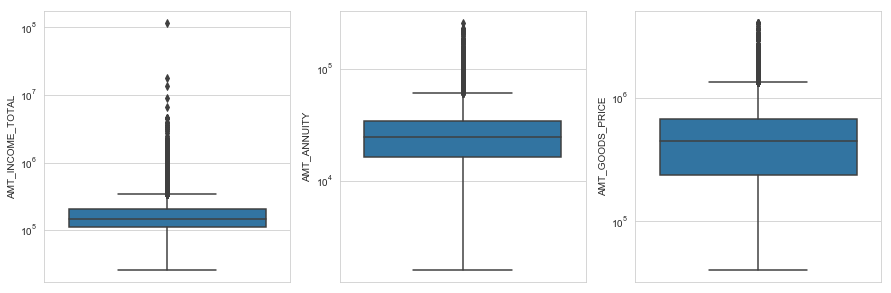

In [676]:
 # boxplot of a variable AMT_INCOME_TOTAL, AMT_ANNUITY, AMT_GOODS_PRICE
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=DF_APP_DATA['AMT_INCOME_TOTAL'])
plt.yscale('log')


plt.subplot(1, 3, 2)
sns.boxplot(y=DF_APP_DATA['AMT_ANNUITY'])
plt.yscale('log')


plt.subplot(1, 3, 3)
sns.boxplot(y=DF_APP_DATA['AMT_GOODS_PRICE'])
plt.yscale('log')
plt.show()

 

## Observation:

#### From the above box plot for AMT_INCOME_TOTAL/AMT_ANNUITY/AMT_GOODS_PRICE we     can observe that there are lots of outliers in the data.
#### Outliers are the extremely High and low values. Due to which data is skewed. To check for        outlier we need to comare mean and median 
#### if there is a huge difference in the mean and median values, then definitely there must be          outliers.
#### Lets identify from the DF_APP_DATA_NUM_COL.describe() metric which columns have              outliers.

In [677]:
# Seperate the numeric columns
NumericCols = DF_APP_DATA.select_dtypes([np.number]).columns
DF_APP_DATA_NUM_COL =  DF_APP_DATA[NumericCols]

print(DF_APP_DATA_NUM_COL.describe())

# below List of the columns having outliers, 
# As there is huge idfference in mean and median value and range of min value and max value is too high.
# 1 AMT_INCOME_TOTAL
# 2 Total_enq
# 3 OBS_30_CNT_SOCIAL_CIRCLE
# 4 DEF_30_CNT_SOCIAL_CIRCLE
# 5 DEF_60_CNT_SOCIAL_CIRCLE
# 6 OBS_60_CNT_SOCIAL_CIRCLE

#Lets remove the outlier , take the values above 5 Percentile and below 95 percentile
low = .05
high = .95
quant_df = DF_APP_DATA_NUM_COL.quantile([low, high])
print(quant_df)


# Removed the outliers, drop the rows above 95 % value of AMT_INCOME_TOTAL/AMT_ANNUITY/AMT_CREDIT/AMT_GOODS_PRICE. 5% of the data has been dropped
DF_APP_DATA.drop(DF_APP_DATA[(DF_APP_DATA['AMT_INCOME_TOTAL']>337500.0) & (DF_APP_DATA['AMT_INCOME_TOTAL']<67500.0)].index, axis = 0, inplace = True)

DF_APP_DATA.drop(DF_APP_DATA[(DF_APP_DATA['AMT_ANNUITY']>53325.0) & (DF_APP_DATA['AMT_ANNUITY']< 9000.0)].index, axis = 0, inplace = True)

DF_APP_DATA.drop(DF_APP_DATA[(DF_APP_DATA['AMT_CREDIT']>1350000.0) & (DF_APP_DATA['AMT_CREDIT']<135000.0)].index, axis = 0, inplace = True)

DF_APP_DATA.drop(DF_APP_DATA[(DF_APP_DATA['AMT_GOODS_PRICE']>1305000.0) & (DF_APP_DATA['AMT_GOODS_PRICE'] < 135000.0)].index, axis = 0, inplace = True)


# Remove outlier for Social Circle
DF_APP_DATA.drop(DF_APP_DATA[DF_APP_DATA['OBS_30_CNT_SOCIAL_CIRCLE'] > 6.0].index, axis = 0, inplace = True)

DF_APP_DATA.drop(DF_APP_DATA[DF_APP_DATA['OBS_60_CNT_SOCIAL_CIRCLE'] >  6.0].index, axis = 0, inplace = True)

# Remove outlier for Total_enq
DF_APP_DATA.drop(DF_APP_DATA[DF_APP_DATA['Total_enq'] > 2.0].index, axis = 0, inplace = True)

# Check if there is any further outlier in the data set
print(DF_APP_DATA_NUM_COL.describe())


          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

# Task 4: 
## 4.1 Identify if there is data imbalance in the data. Find the ratio of data imbalance.

11.375961202376791


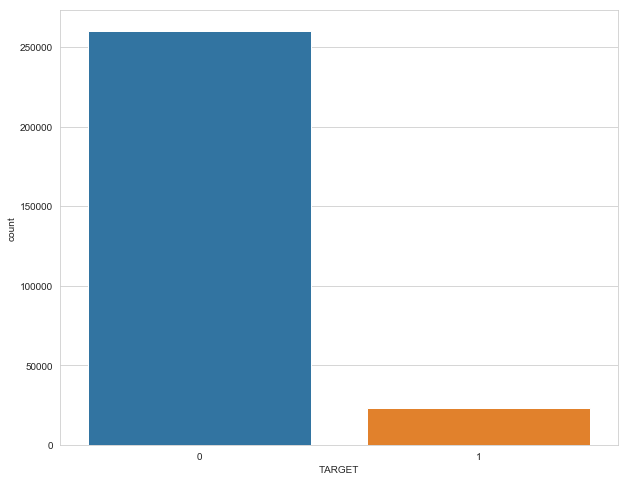

In [678]:
# Plot the frquency of the TARGET column to check for data imbalance.
# As we can see from the below plot, Number with value 0(All other cases when the payment is paid on time) is more means, there are less number of defaulter(The client with payment difficulties). 
# As there is a huge difference in values we can say that data is imbalance.
# Ratio of data imbalance 
NUM_ALL_CASES = DF_APP_DATA.loc[(DF_APP_DATA['TARGET'] == 0),'TARGET'].count()
NUM_DIFFICULTIES = DF_APP_DATA.loc[(DF_APP_DATA['TARGET'] == 1),'TARGET'].count()
Imbalance_Ratio = NUM_ALL_CASES/NUM_DIFFICULTIES

print(Imbalance_Ratio)

# univariate analysis of variable 'TARGET'
plt.figure(figsize=(10, 8))
sns.countplot(x="TARGET", data=DF_APP_DATA)
plt.show()

# 4.2 Data Balancing using Undersampling(undersample majority class)

In [679]:

#Undersampling is the process where you randomly delete some of the observations from the majority class(0) 
#in order to match the numbers with the minority class(1)

# Shuffle the Dataset.
DF_SHUFFLED = DF_APP_DATA.sample(frac=1,random_state=4)


# Put all the DIFFICUTIES class in a separate dataset.
df_app_target1 = DF_SHUFFLED.loc[DF_SHUFFLED['TARGET'] == 1]

# Count the Numbers with difficulty class 
print(df_app_target1.count())   #22888

#Randomly select 24825 observations from the ALL_CASES(majority class)
df_app_target0 = DF_SHUFFLED.loc[DF_SHUFFLED['TARGET'] == 0].sample(n=22888,random_state=42)

# Concatenate both dataframes again
DF_NORMALIZED = pd.concat([df_app_target1, df_app_target0])


SK_ID_CURR                     22888
TARGET                         22888
NAME_CONTRACT_TYPE             22888
CODE_GENDER                    22888
FLAG_OWN_CAR                   22888
FLAG_OWN_REALTY                22888
CNT_CHILDREN                   22888
AMT_INCOME_TOTAL               22888
AMT_CREDIT                     22888
AMT_ANNUITY                    22888
AMT_GOODS_PRICE                22869
NAME_TYPE_SUITE                22825
NAME_INCOME_TYPE               22888
NAME_EDUCATION_TYPE            22888
NAME_FAMILY_STATUS             22888
NAME_HOUSING_TYPE              22888
REGION_POPULATION_RELATIVE     22888
DAYS_BIRTH                     22888
DAYS_EMPLOYED                  22888
DAYS_REGISTRATION              22888
DAYS_ID_PUBLISH                22888
FLAG_MOBIL                     22888
FLAG_EMP_PHONE                 22888
FLAG_WORK_PHONE                22888
FLAG_CONT_MOBILE               22888
FLAG_PHONE                     22888
FLAG_EMAIL                     22888
O

# Task 5: Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

## 5.1  Univariate Analysis on Current App Dataset

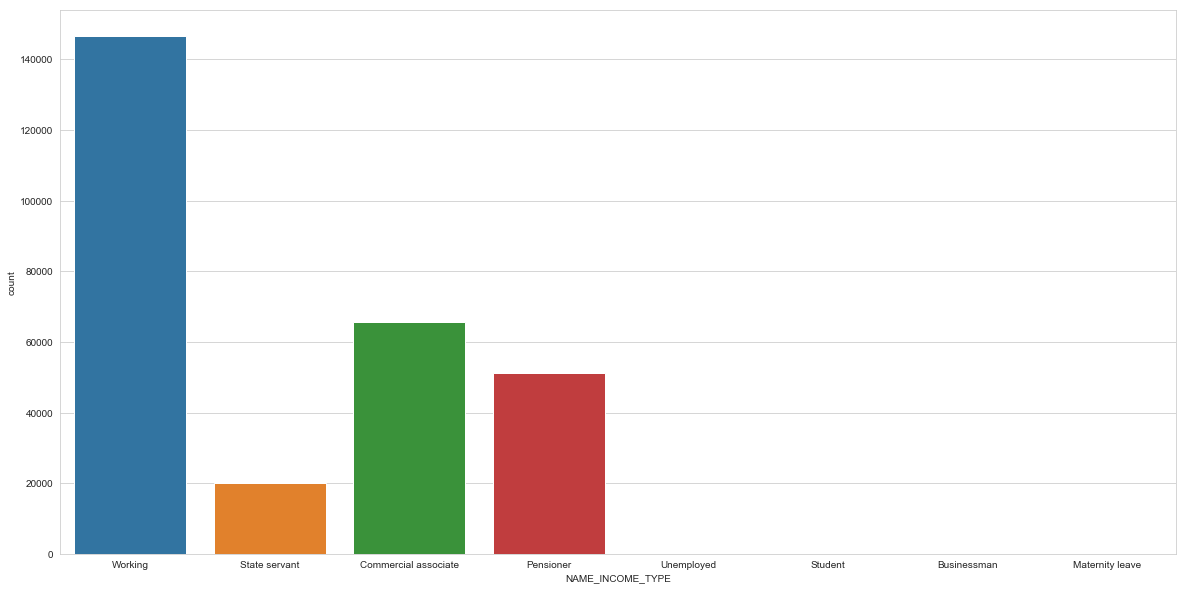

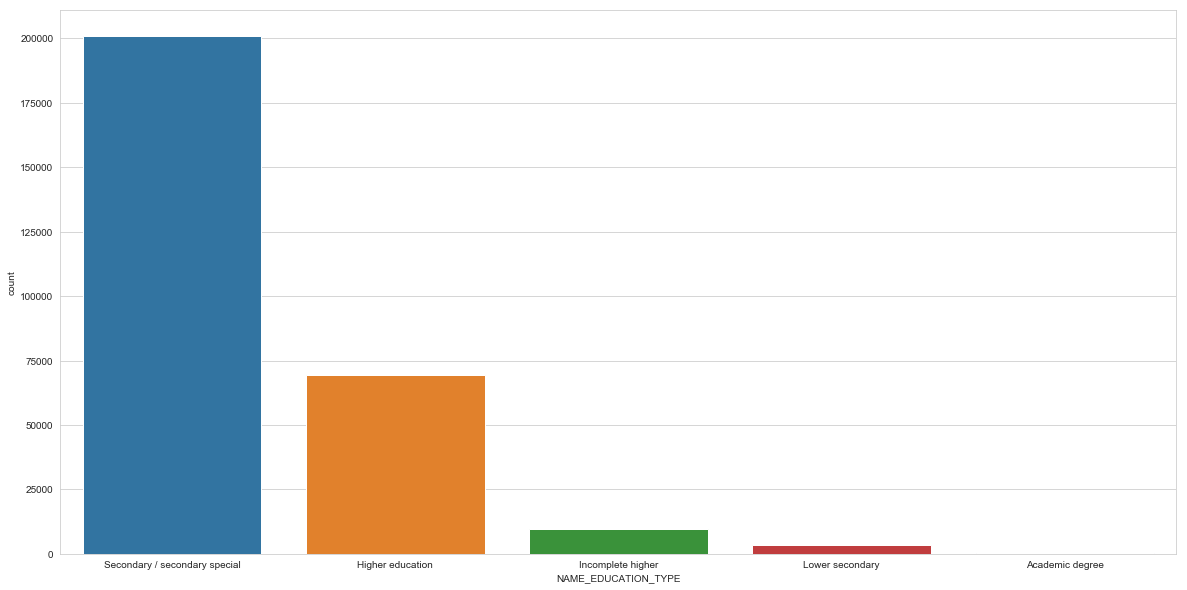

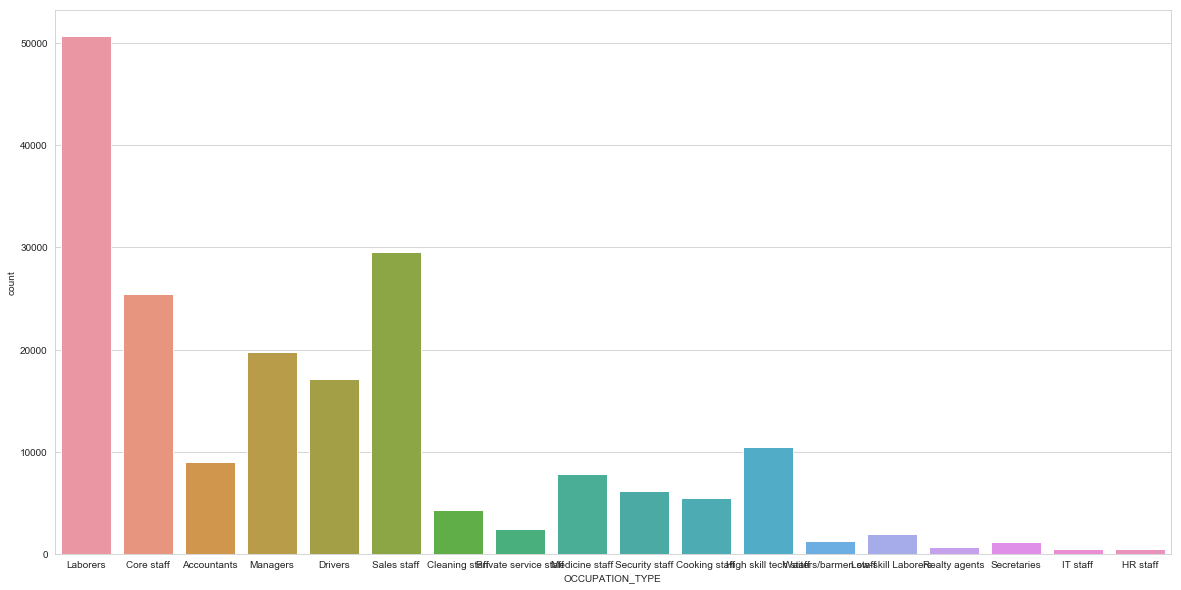

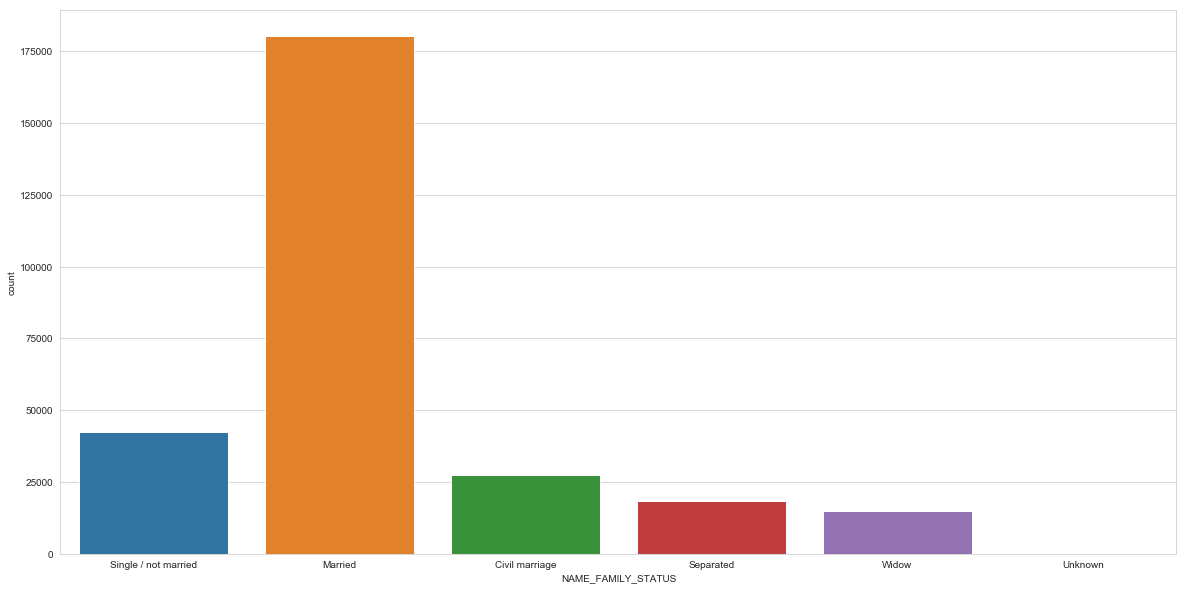

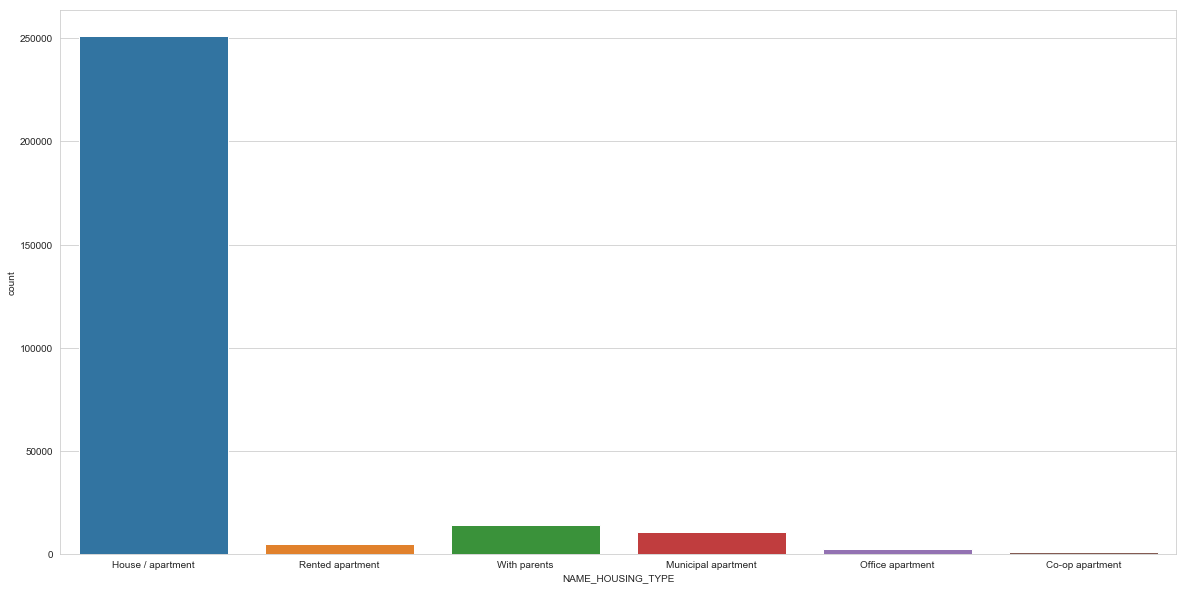

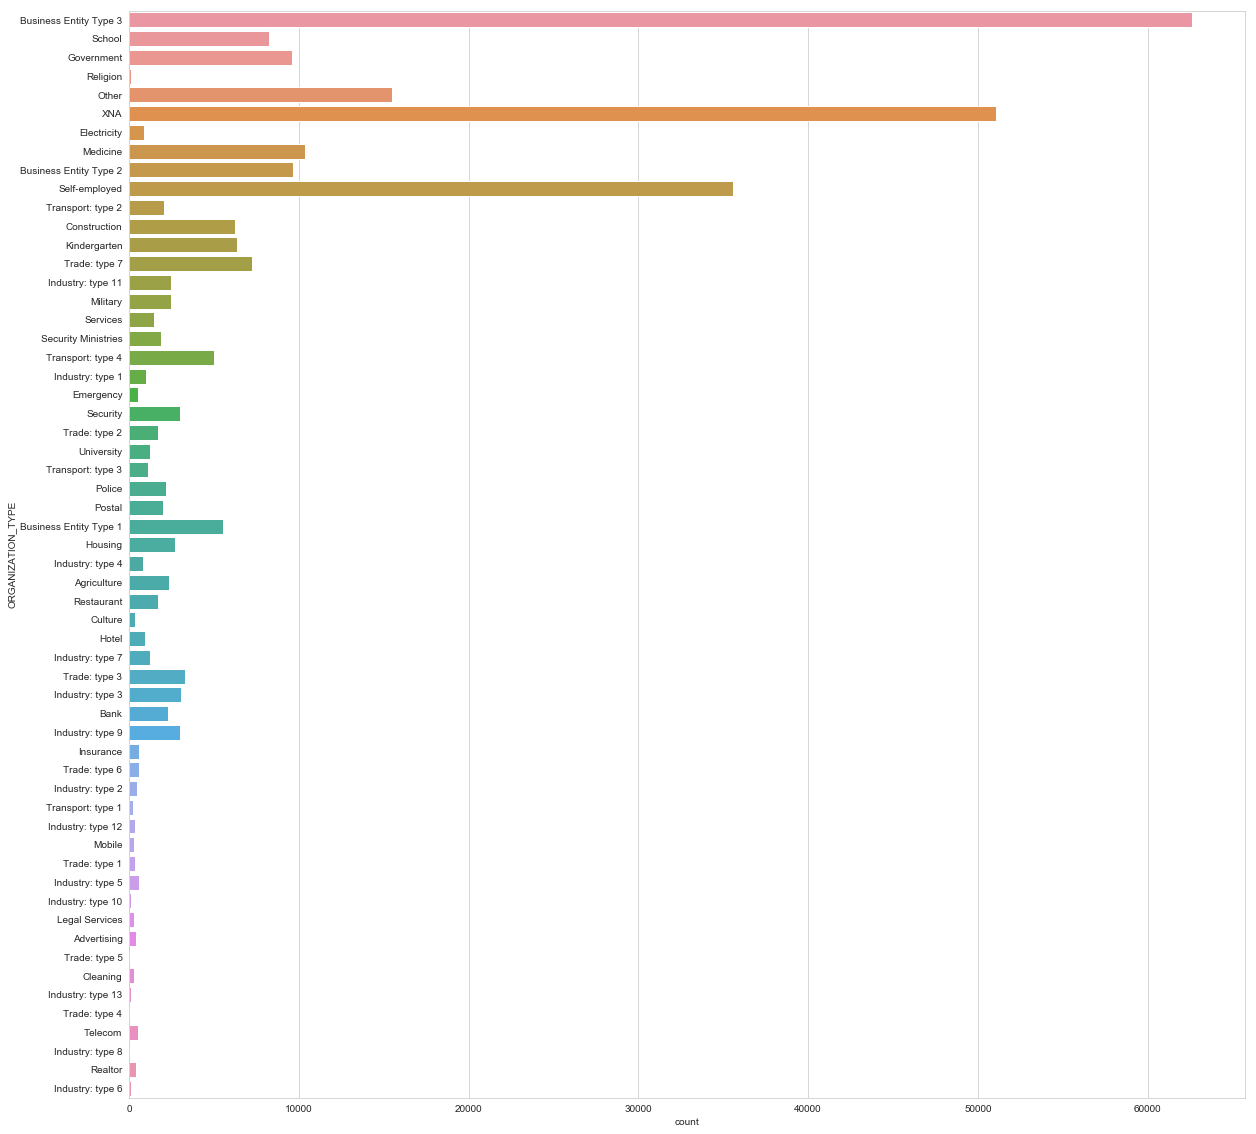

In [680]:
# anlaysis of categorical variables - univariate
plt.figure(figsize=(20, 10))
sns.countplot(x='NAME_INCOME_TYPE', data=DF_APP_DATA)
plt.show()

plt.figure(figsize=(20, 10))
sns.countplot(x='NAME_EDUCATION_TYPE', data=DF_APP_DATA)
plt.show()

plt.figure(figsize=(20, 10))
sns.countplot(x='OCCUPATION_TYPE', data=DF_APP_DATA)
plt.show()


plt.figure(figsize=(20, 10))
sns.countplot(x='NAME_FAMILY_STATUS', data=DF_APP_DATA)
plt.show()

plt.figure(figsize=(20, 10))
sns.countplot(x='NAME_HOUSING_TYPE', data=DF_APP_DATA)
plt.show()

plt.figure(figsize=(20, 20))
sns.countplot(y='ORGANIZATION_TYPE', data=DF_APP_DATA)
plt.show()


### Observation :
#### NAME_INCOME_TYPE : No. of people opting for Loan for income categories Working/ State Servent /Commercial Associate/Pensioner are significant as compare to other categories 
#### NAME_EDUCATION_TYPE : No. of people opting for Loan for Education type categories Seconary/Higher are significant as compare to other categories 

#### OCCUPATION_TYPE : No. of people opting for Loan for occupation categories Laborers/Core Staff/Sales Staff are significant as compare to other categories 

#### NAME_FAMILY_STATUS: No. of Married people applying for loan is much higher then other categories

#### NAME_HOUSING_TYPE:  No. of people staying in Apartment are applying for loan is much higher then other categories

#### ORGANIZATION_TYPE :  people in this category "Self Employed and Business entity type 3 " Apply for more loan


## 5.2 Bivariate Analysis

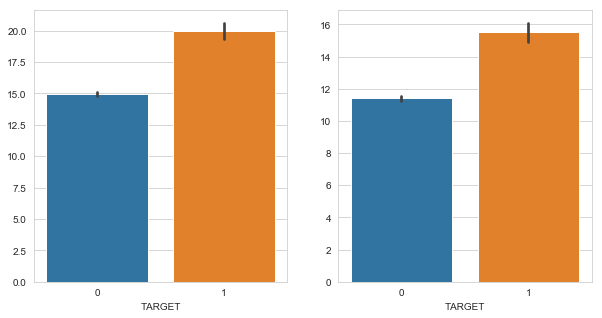

In [681]:
# Analysis 1  : Social Circle column(DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE/DEF_60_CNT_SOCIAL_CIRCLE/OBS_60_CNT_SOCIAL_CIRCLE. 

# lets take the ratio of No. of actual defaulter and the no. of cases observed for 30 days and 60 days respectively
Social_circle_30 = round(100*(DF_APP_DATA['DEF_30_CNT_SOCIAL_CIRCLE']/DF_APP_DATA['OBS_30_CNT_SOCIAL_CIRCLE']),2)
Social_circle_60 = round(100*(DF_APP_DATA['DEF_60_CNT_SOCIAL_CIRCLE']/DF_APP_DATA['OBS_60_CNT_SOCIAL_CIRCLE']),2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='TARGET', y=Social_circle_30, data=DF_APP_DATA)

plt.subplot(1, 2, 2)
sns.barplot(x='TARGET', y=Social_circle_60, data=DF_APP_DATA)
plt.show()



## Observation (Social Circle column): 
#### As there are many people in the Social circle who are defaulter , Chance of defaulting a person increase because ## social circle has an impact on persons habbit.

#### Hence this is one of the factor which influence the dafault case

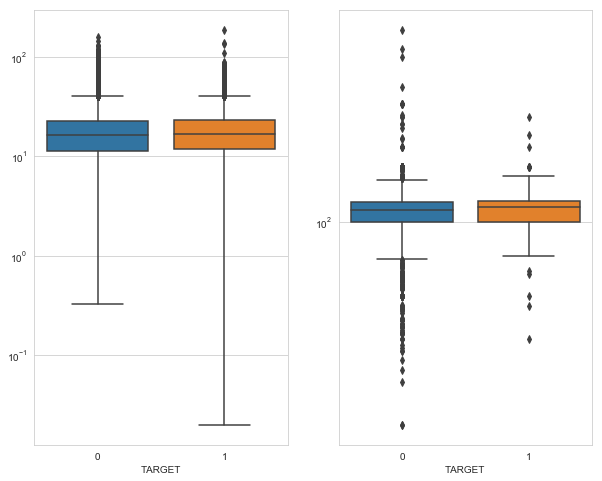

In [682]:
# Analysis 2 : AMT_ANNUITY/AMT_INCOME_TOTAL/AMT_CREDIT/AMT_GOODS_PRICE
plt.figure(figsize=(10, 8))

# Lets check if the level of income and loan installement has an impact on default
# take the ratio of AMT_ANNUITY and AMT_INCOME_TOTAL and make a box plot for TARGET value 0 and 1
Income_Annuity_ratio = round(100*(DF_APP_DATA['AMT_ANNUITY']/DF_APP_DATA['AMT_INCOME_TOTAL']), 2)

plt.subplot(1, 2, 1)
sns.boxplot(x='TARGET',y=Income_Annuity_ratio, data=DF_APP_DATA)
plt.yscale('log')

# Lets check if the level of AMT_CREDIT(loan amount) and AMT_GOODS_PRICE(value of goods) has an impact on default 
# take the ratio of AMT_CREDIT and AMT_GOODS_PRICE and make a box plot for TARGET value 0 and 1
Credit_GoodsPrice_ratio = round(100*(DF_APP_DATA['AMT_CREDIT']/DF_APP_DATA['AMT_GOODS_PRICE']), 2)
plt.subplot(1, 2, 2)
sns.boxplot(x='TARGET',y=Credit_GoodsPrice_ratio, data=DF_APP_DATA)
plt.yscale('log')
plt.show()


### Observation 
##### (AMT_ANNUITY/AMT_INCOME_TOTAL/AMT_CREDIT/AMT_GOODS_PRICE) : All These 4 columns does not seem to have an Impact on default cases

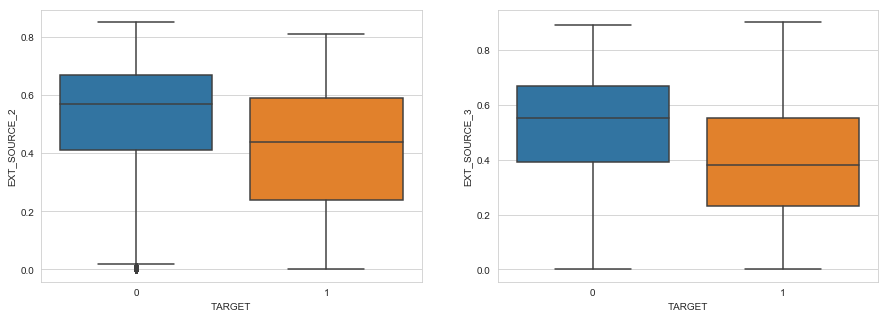

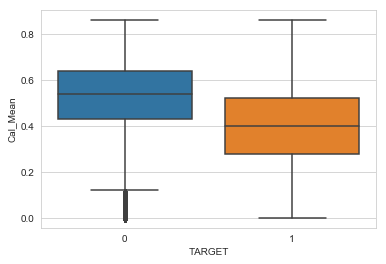

In [683]:
# Analysis 3 : EXT_SOURCE_2,EXT_SOURCE_3
# boxplot of a variable EXT_SOURCE_2,EXT_SOURCE_3 and their mean.

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='TARGET', y='EXT_SOURCE_2', data=DF_APP_DATA)

plt.subplot(1, 2, 2)
sns.boxplot(x='TARGET', y='EXT_SOURCE_3', data=DF_APP_DATA)
plt.show()

DF_EXT_SOURCE =  DF_APP_DATA.loc[:,('EXT_SOURCE_2','EXT_SOURCE_3')] 
DF_EXT_SOURCE['Cal_Mean'] = round(DF_EXT_SOURCE.mean(axis = 1),2)

sns.boxplot(x=DF_APP_DATA['TARGET'], y=DF_EXT_SOURCE['Cal_Mean'])
plt.show()


## Observation(EXT_SOURCE): 
#### From All the above plots we can observe that EXT_SOURCE_1/2/3 has a huge impact on defaulter.
#### As EXT_SOURCE is the credit rating provided by the third party. Based on the Credit rating Bank may decide if the loan can be given to the customer. Customer with lower credit rating are more likely to default.


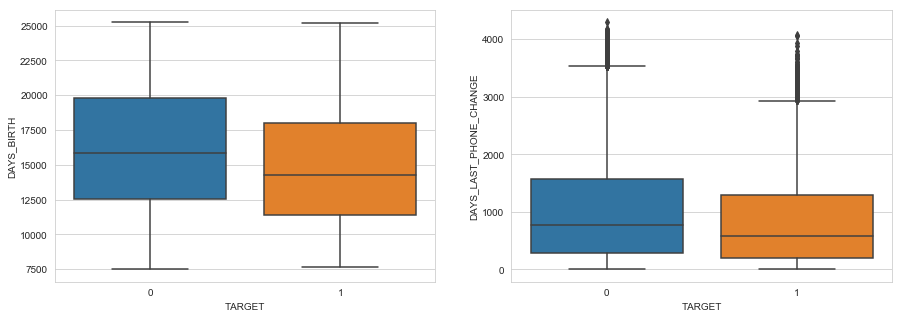

In [684]:
# ANALYSIS 4 : DAYS_BIRTH/DAYS_LAST_PHONE_CHANGE
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='TARGET', y='DAYS_BIRTH', data=DF_APP_DATA)

plt.subplot(1, 2, 2)
sns.boxplot(x='TARGET', y='DAYS_LAST_PHONE_CHANGE', data=DF_APP_DATA)
plt.show()

## Observation(DAYS_BIRTH/DAYS_LAST_PHONE_CHANGE):
#### From All the above plots we can observe that DAYS_BIRTH : Higher the age(may be Old age), more likely the person will default
#### DAYS_LAST_PHONE_CHANGE: if the phone number has been changed recently, chances of a person to default increases

#### We may consider these 2 columns as itmay have impact on defaulter.


## 5.3 Bivariate analysis on Categorical Variable on the Normalized Sample data set of Current Application

6


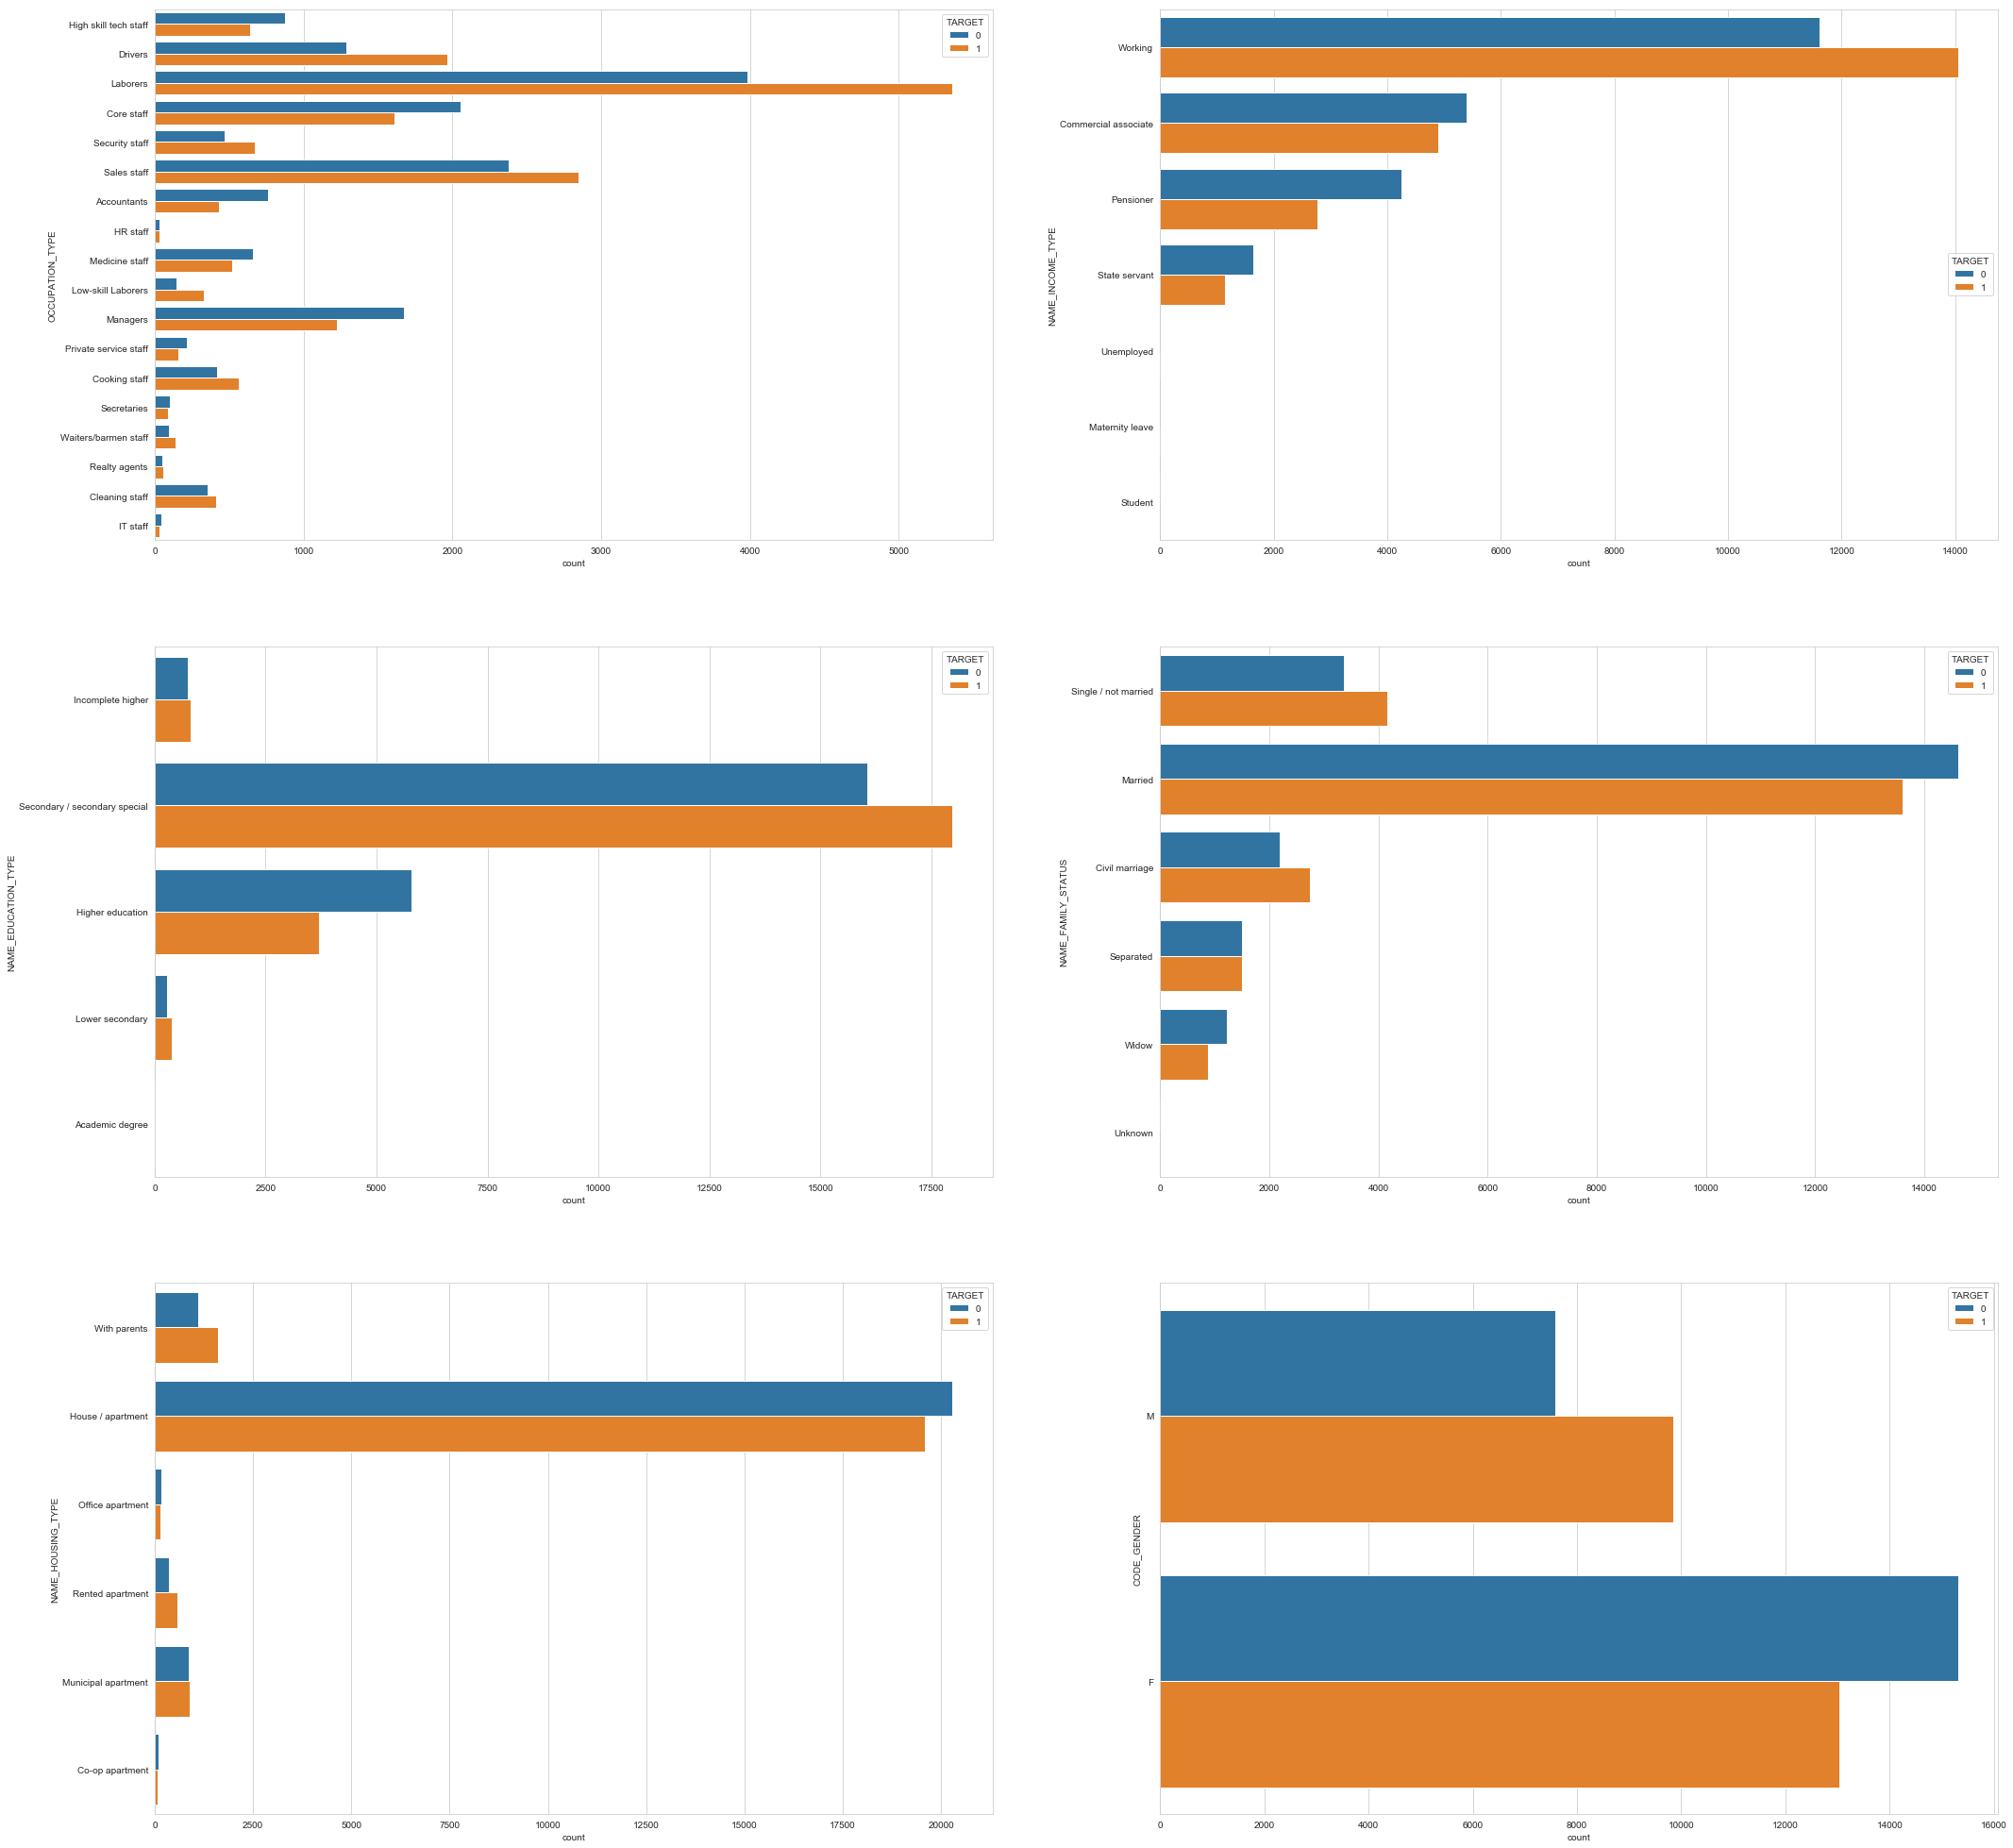

In [685]:
cat_fields = ["OCCUPATION_TYPE", "NAME_INCOME_TYPE","NAME_EDUCATION_TYPE",
              "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","CODE_GENDER"]

print(len(cat_fields))
plt.figure(figsize=(35,60))

idx = 1 
for cat in cat_fields:
    plt.subplot(5,2,idx)
    sns.countplot(y=cat,hue="TARGET",data=DF_NORMALIZED, orient='h')
    idx+=1

## Observation:
**Following fields are significant**
- CODE_GENDER
    - 'FeMale' having much more % population with No payment difficulty
- NAME_INCOME_TYPE
    - with values "State servant" and "Pensioner"  having much more % population with no payment difficulty
- NAME_EDUCATION_TYPE
    - "Higher education" having much more % population with no payment difficulty
    - "Lower secondary"  and "Secondary" having much more % population with payment difficulty
- NAME_HOUSING_TYPE
    - "With parents" and "Rented apartment" having much more % pouplation with payment difficulty
- OCCUPATION_TYPE
    - "Security staff", "Laborers", "Cooking staff", "Drivers" having much more % in population with payment difficulty
    - "Core staff","High skill tech staff","Accountants" having much more % in population with NO payment difficulty
- ORGANIZATION_TYPE
    - "Construction", "Industry: type 3" having much more % in population with payment difficulty
    - "School" having much more % in population with NO payment difficulty

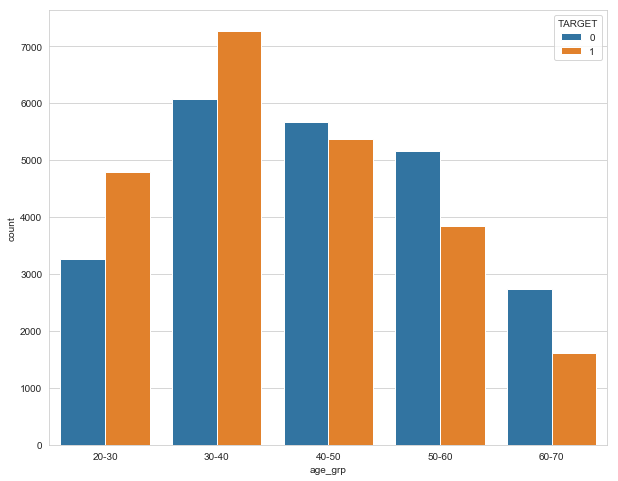

In [686]:
# Data binning : Create the bins of DAYS_BIRTH column
DF_NORMALIZED['age_grp'] = (DF_NORMALIZED['DAYS_BIRTH']/365).apply(lambda x: round(x, 2))
min(DF_NORMALIZED['age_grp']) #20.52
max(DF_NORMALIZED['age_grp']) #69.12

bins = [20, 30, 40, 50, 60, 70 ]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
DF_NORMALIZED['age_grp'] = pd.cut(DF_NORMALIZED['age_grp'], bins = bins, labels = labels)
DF_NORMALIZED['age_grp']

plt.figure(figsize=(10, 8))
sns.countplot(x='age_grp', hue= 'TARGET',data=DF_NORMALIZED)
plt.show()

## Observation:

- age_grp: 20-30/30-40 having much more % population with payment difficulty

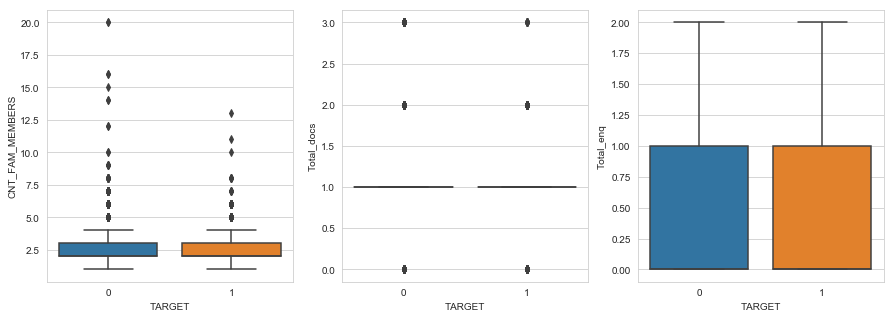

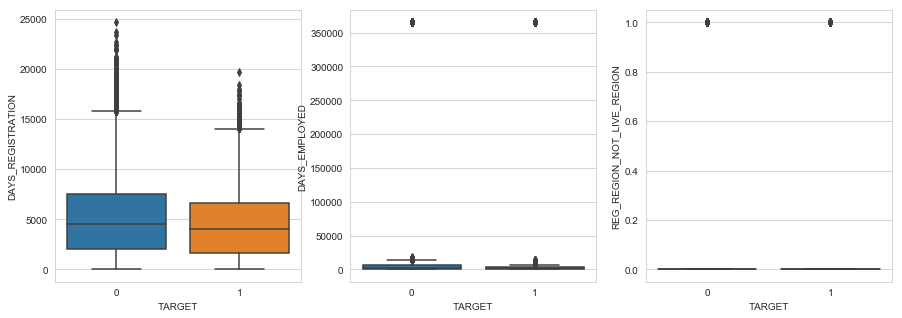

In [687]:
#ANALYSIS 6 : CNT_FAM_MEMBERS/Total_docs/Total_enq/DAYS_REGISTRATION/DAYS_EMPLOYED/REG_REGION_NOT_LIVE_REGION/LIVE_REGION_NOT_WORK_REGION
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='TARGET', y='CNT_FAM_MEMBERS', data=DF_APP_DATA)

plt.subplot(1, 3, 2)
sns.boxplot(x='TARGET', y='Total_docs', data=DF_APP_DATA)

plt.subplot(1, 3, 3)
sns.boxplot(x='TARGET', y='Total_enq', data=DF_APP_DATA)
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='TARGET', y='DAYS_REGISTRATION', data=DF_APP_DATA)

plt.subplot(1, 3, 2)
sns.boxplot(x='TARGET', y='DAYS_EMPLOYED', data=DF_APP_DATA)

plt.subplot(1, 3, 3)
sns.boxplot(x='TARGET', y='REG_REGION_NOT_LIVE_REGION', data=DF_APP_DATA)
plt.show()


## Observation: NO Impact

 - CNT_FAM_MEMBERS/Total_docs/Total_enq/DAYS_REGISTRATION/DAYS_EMPLOYED/REG_REGION_NOT_LIVE_REGION


## 5.4 Analyse Numeric columns using current and Prev_App data Set
###  First find the impact of previous outstanding applications, loans on TARGET field

#### Methodology Applied:
- Sum the annuity for all previous applications where the payment is still due
    - filter where DAYS_TERMINATION is still +ve i.e. loan is still active
- Add the outstanding annuity to current application annuity
- Find the annuity to income ratio
- Compare between Target 0 and target 1 population and see if any significant difference

count    22888.000000
mean         0.443801
std          0.310202
min          0.008824
25%          0.240348
50%          0.364444
75%          0.557294
max          6.834415
Name: annuity_income_ratio, dtype: float64
count    22888.000000
mean         0.415925
std          0.290874
min          0.000303
25%          0.235945
50%          0.343603
75%          0.507262
max          5.991735
Name: annuity_income_ratio, dtype: float64


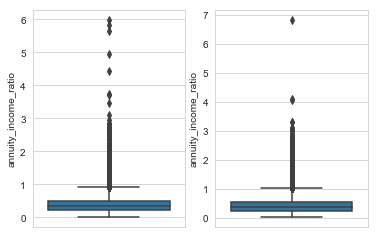

In [688]:
#Sum the annuity for all prev applications where the payment is still due and find its ratio against income

# filter only the approved applications for each SK_ID_CURR
df_prev_app_filtered = DF_PREV_APP.loc[DF_PREV_APP["NAME_CONTRACT_STATUS"]== 'Approved']

#filter where DAYS_TERMINATION is still +ve i.e. loan is still active
df_prev_app_filtered = df_prev_app_filtered.loc[df_prev_app_filtered["DAYS_TERMINATION"]>=0]

df_prev_app_filtered = df_prev_app_filtered.groupby("SK_ID_CURR").sum()["AMT_ANNUITY"]

df_app_target1_new = df_app_target1.join(df_prev_app_filtered, on="SK_ID_CURR",rsuffix="_prev")
df_app_target1_new.loc[pd.isnull(df_app_target1_new["AMT_ANNUITY_prev"]),["AMT_ANNUITY_prev"]] = 0

# find total outstanding annuity ratio against income
df_app_target1_new["annuity_income_ratio"] = (df_app_target1_new["AMT_ANNUITY"].astype(np.int) + df_app_target1_new["AMT_ANNUITY_prev"].astype(np.int)) /  (df_app_target1_new["AMT_INCOME_TOTAL"].astype(np.int)) 

df_app_target0_new = df_app_target0.join(df_prev_app_filtered, on="SK_ID_CURR",rsuffix="_prev")
df_app_target0_new.loc[pd.isnull(df_app_target0_new["AMT_ANNUITY_prev"]),["AMT_ANNUITY_prev"]] = 0
df_app_target0_new.loc[pd.isnull(df_app_target0_new["AMT_ANNUITY"]),["AMT_ANNUITY"]] = 0

# find total outstanding annuity ratio against income
df_app_target0_new["annuity_income_ratio"] = (df_app_target0_new["AMT_ANNUITY"].astype(np.int) + df_app_target0_new["AMT_ANNUITY_prev"].astype(np.int)) /  (df_app_target0_new["AMT_INCOME_TOTAL"].astype(np.int)) 

plt.yscale('log')
plt.subplot(1,2,1)
sns.boxplot(y="annuity_income_ratio",data=df_app_target1_new)

plt.subplot(1,2,2)
sns.boxplot(y="annuity_income_ratio",data=df_app_target0_new)

print(df_app_target0_new["annuity_income_ratio"].describe())
print(df_app_target1_new["annuity_income_ratio"].describe())

### Conclusion : No Significance
**As we can see the mean, median and inter-quartile ranges are almost similar between Target 0 and Target1. So it can be concluded that Annuity and Income does not have any significant difference for Target 0 and Target 1 population**

## 5.5  Merge 2 data set DF_APP_DATA, DF_PREV_APP and analyse

In [689]:
# Merge the dataset DF_APP_DATA, DF_PREV_APP, Merge key is the SK_ID_CURR which is common in both dataset
DF_COMBINED = pd.merge(DF_APP_DATA,DF_PREV_APP,left_on= 'SK_ID_CURR',right_on='SK_ID_CURR')
DF_COMBINED.shape

(1270176, 82)

In [690]:
# lets normalize the data set and Create a random sample from the merged dataset
df_merged_target0 = DF_COMBINED.loc[DF_COMBINED["TARGET"]== 0]
df_merged_target1 = DF_COMBINED.loc[DF_COMBINED["TARGET"]== 1]

no_target1 = len(df_merged_target1)
target0_indices = range(0,len(df_merged_target0))

undersample_indices = np.random.choice(target0_indices,no_target1, replace=False)

# df_merged_target0 has been undersample to len(df_merged_target1)
df_merged_target0 = df_merged_target0.loc[undersample_indices]


print(df_merged_target0.shape)
print(df_merged_target1.shape)

# Combine the Target 0and Target 1 row into 1 dataset . we will get df_merged_undersampled as sampled dataset after merging of current app and prev appl
df_merged_undersampled = df_merged_target0.append(df_merged_target1)
df_merged_undersampled.columns

(109892, 82)
(109892, 82)


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'EMERGENCYSTATE_MODE', 

## 5.6 Analysis of Categorical Variable on Merged Sampled dataset

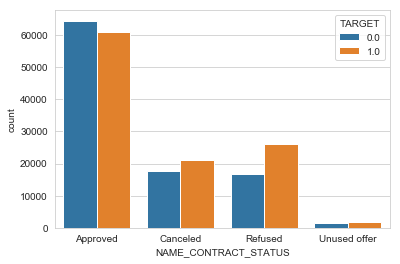

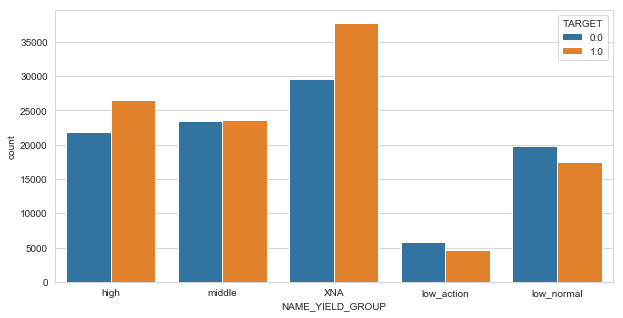

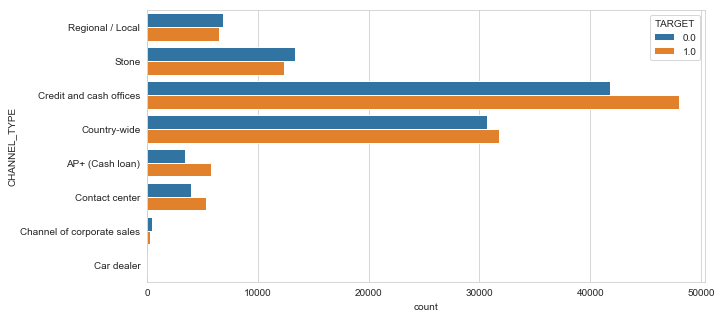

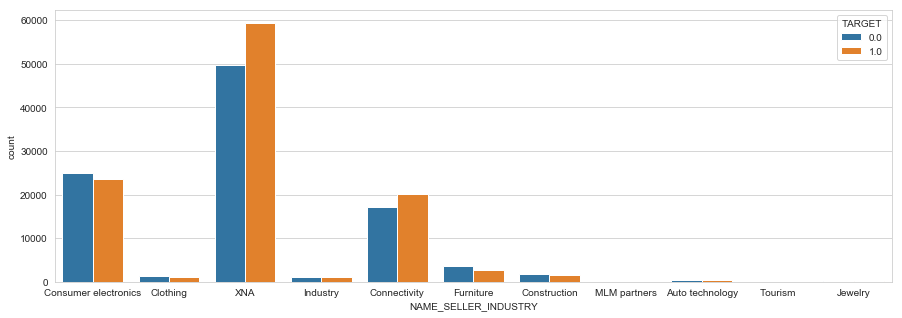

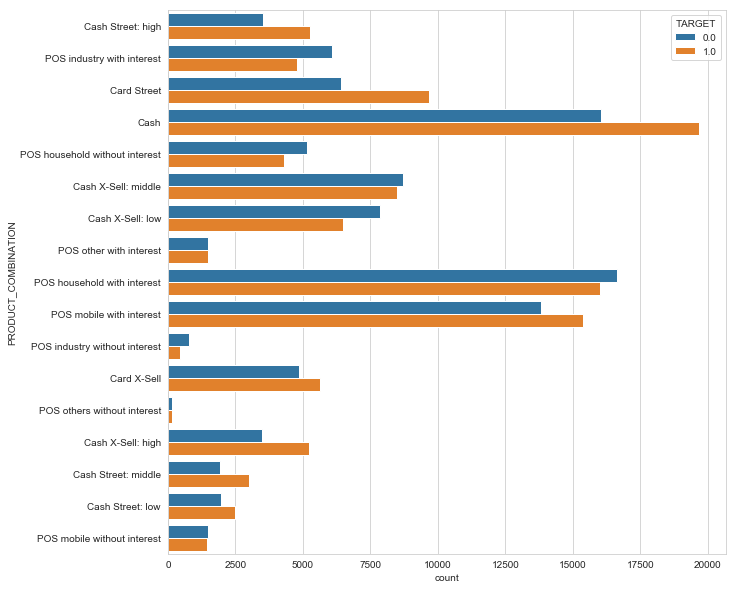

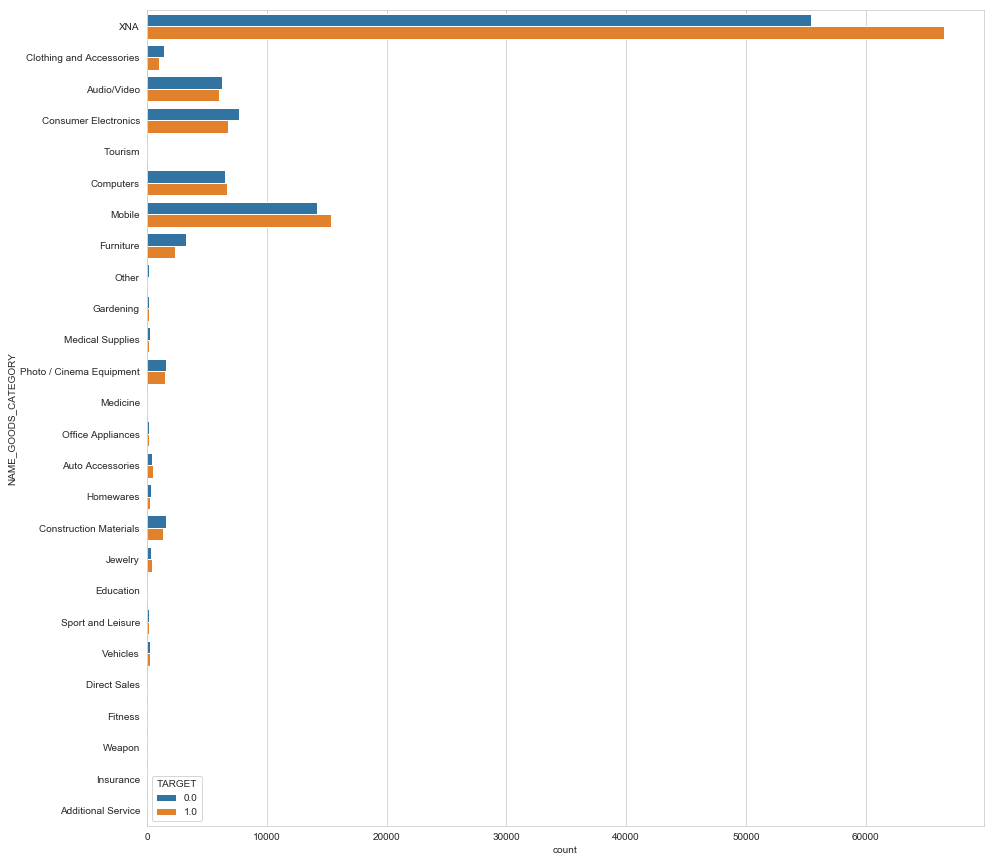

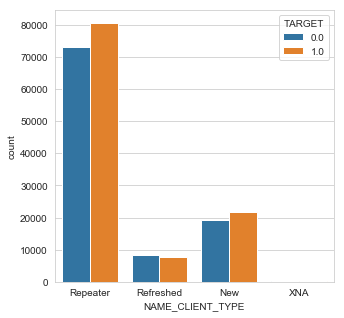

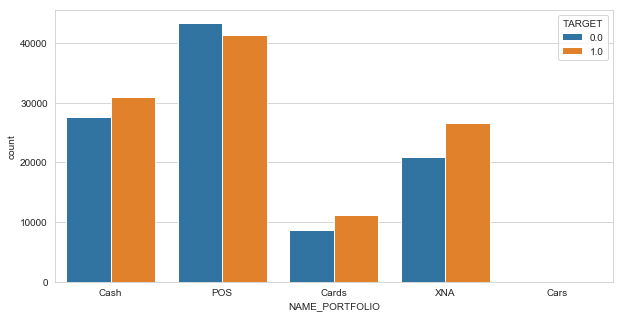

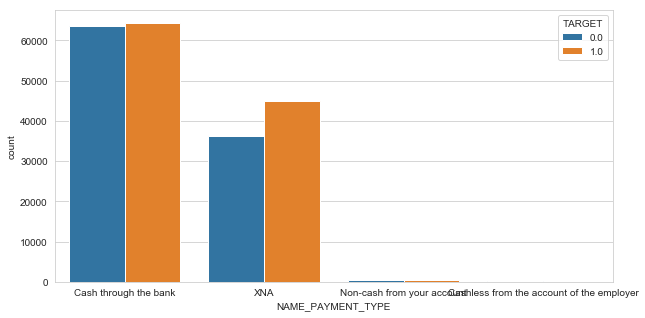

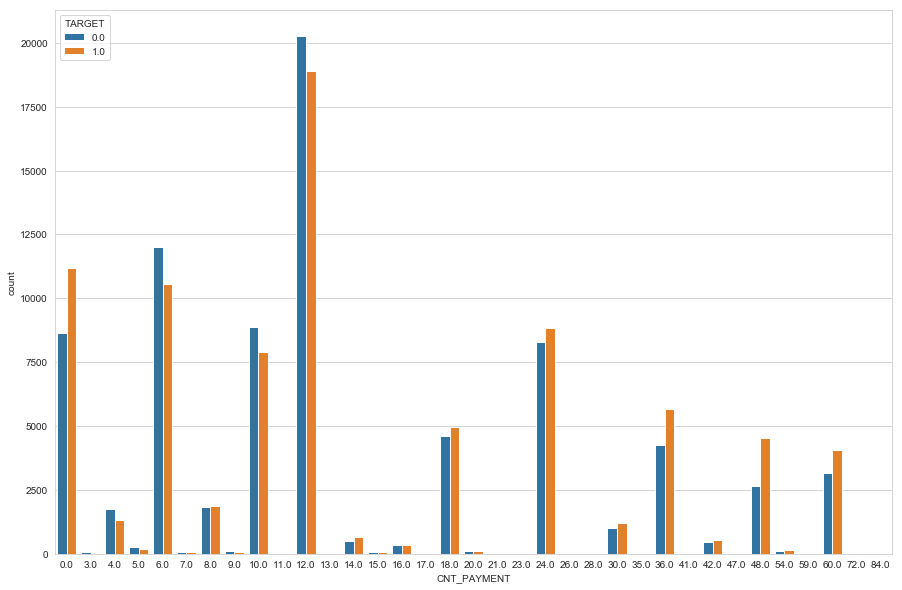

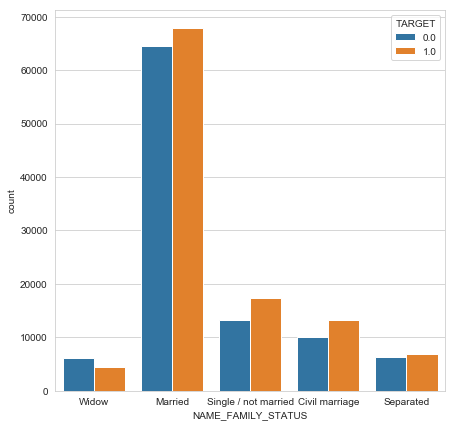

In [691]:
sns.countplot(x="NAME_CONTRACT_STATUS",hue="TARGET",data=df_merged_undersampled)

plt.figure(figsize=(10,5))
sns.countplot(x="NAME_YIELD_GROUP",hue="TARGET",data=df_merged_undersampled)

plt.figure(figsize=(10,5))
sns.countplot(y="CHANNEL_TYPE",hue="TARGET",data=df_merged_undersampled,orient='h')

plt.figure(figsize=(15,5))
sns.countplot(x="NAME_SELLER_INDUSTRY",hue="TARGET",data=df_merged_undersampled,orient='h')

plt.figure(figsize=(10,10))
sns.countplot(y="PRODUCT_COMBINATION",hue="TARGET",data=df_merged_undersampled, orient='h')


plt.figure(figsize=(15,15))
sns.countplot(y="NAME_GOODS_CATEGORY",hue="TARGET",data=df_merged_undersampled, orient='h')

plt.figure(figsize=(5,5))
sns.countplot(x="NAME_CLIENT_TYPE",hue="TARGET",data=df_merged_undersampled, orient='v')


plt.figure(figsize=(10,5))
sns.countplot(x="NAME_PORTFOLIO",hue="TARGET",data=df_merged_undersampled, orient='v')


plt.figure(figsize=(10,5))
sns.countplot(x="NAME_PAYMENT_TYPE",hue="TARGET",data=df_merged_undersampled, orient='h')


plt.figure(figsize=(15,10))
sns.countplot(x="CNT_PAYMENT",hue="TARGET",data=df_merged_undersampled, orient='h')

 
plt.figure(figsize=(7,7))
sns.countplot(x="NAME_FAMILY_STATUS",hue="TARGET",data=df_merged_undersampled, orient='v')

 


## Observation:
**Following fields are significant**
- NAME_CONTRACT_STATUS
    - 'Refused' having much more % population with payment difficulty. Which is correct. Loan should be refused to customer with payment difficulties
- NAME_YIELD_GROUP
    - 'High interest rate' having much more % population with payment difficulty
- CHANNEL_TYPE
    - with values "Credit and cash Office/contact center/ AP+(cash loan)" having much more % population with payment difficulty
- NAME_SELLER_INDUSTRY
    - "Connectivity" having much more % population with payment difficulty
- PRODUCT_COMBINATION
    - "CASH/Card Street/POS Mobile with interest" having much more % population with payment difficulty
- NAME_GOODS_CATEGORY
    - "Mobile" having much more % pouplation with payment difficulty
- NAME_CLIENT_TYPE
    - "Repeater" having much more % in population with payment difficulty
- NAME_PAYMENT_TYPE
    - No Significant Impact
- NAME_PORTFOLIO
    - "Cash/Cards" having much more % in population with payment difficulty
- CNT_PAYMENT
    - 'long Term loan on previous application' having much more % in population with payment difficulty
- NAME_FAMILY_STATUS  
    - 'Single/Not Married/Civil_Marriage' having much more % in population with payment difficulty

# Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

## Observation : Univariate
- NAME_INCOME_TYPE :  
    "Working/ State Servent /Commercial Associate/Pensioner" are significant in Number as compare to other categories
- NAME_EDUCATION_TYPE :  
    "Education type categories Seconary/Higher" are significant in Number as compare to other categories
- OCCUPATION_TYPE : 
    "Laborers/Core Staff/Sales Staff" are significant in Number as compare to other categories
- NAME_FAMILY_STATUS: 
    "Married people applying for loan is much higher then other categories
- NAME_HOUSING_TYPE: 
    "staying in Apartment" are applying for loan is much higher then other categories
- ORGANIZATION_TYPE : 
    "Self Employed and Business entity type 3 " Apply for more loan¶

    
## Observation: Bivariate
**Following fields are significant/Impactful**
- DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE/DEF_60_CNT_SOCIAL_CIRCLE/OBS_60_CNT_SOCIAL_CIRCLE. 
    - As there are many people in the Social circle who are defaulter , Chance of defaulting a person increase because
    - social circle has an impact on persons habbit.
- EXT_SOURCE
    - As EXT_SOURCE is the credit rating provided by the third party. Based on the Credit rating Bank may decide if the loan can be given to the customer. 
    - Customer with lower credit rating are more likely to default.
- CODE_GENDER
    - 'FeMale' having much more % population with NO payment difficulty
- NAME_INCOME_TYPE
    - with values "State servant" and "Pensioner"  having much more % population with NO payment difficulty
- NAME_EDUCATION_TYPE
    - "Higher education" having much more % population with NO payment difficulty
    - "Lower secondary"  and "Secondary" having much more % population with payment difficulty
- NAME_HOUSING_TYPE
    - "With parents" and "Rented apartment" having much more % pouplation with payment difficulty
- OCCUPATION_TYPE
    - "Security staff", "Laborers", "Cooking staff", "Drivers" having much more % in population with payment difficulty
    - "Core staff","High skill tech staff","Accountants" having much more % in population with NO payment difficulty
- ORGANIZATION_TYPE
    - "Construction", "Industry: type 3" having much more % in population with payment difficulty
    - "School" having much more % in population with NO payment difficulty
- NAME_CONTRACT_STATUS
    - 'Refused' having much more % population with payment difficulty. Which is correct. Loan should be refused to customer with payment difficulties
- NAME_YIELD_GROUP
    - 'High interest rate' having much more % population with payment difficulty
- CHANNEL_TYPE
    - with values "Credit and cash Office/contact center/ AP+(cash loan)" having much more % population with payment difficulty
- NAME_SELLER_INDUSTRY
    - "Connectivity" having much more % population with payment difficulty
- PRODUCT_COMBINATION
    - "CASH/Card Street/POS Mobile with interest" having much more % population with payment difficulty
- NAME_GOODS_CATEGORY
    - "Mobile" having much more % population with payment difficulty
- NAME_CLIENT_TYPE
    - "Repeater" having much more % in population with payment difficulty
- NAME_PORTFOLIO
    - "Cash/Cards" having much more % in population with payment difficulty
- CNT_PAYMENT
    - 'long Term loan on previous application' having much more % in population with payment difficulty. Bank should be extra carefull while lending the loan with customer having long term loan on previous Application.
- NAME_FAMILY_STATUS  
    - 'Single/Not Married/Civil_Marriage' having much more % in population with payment difficulty  
- DAYS_BIRTH
    - age_grp: 20-30/30-40 having much more % population with payment difficulty


    
## Observation: NO Impact
 - AMT_ANNUITY
 - AMT_INCOME_TOTAL
 - AMT_CREDIT
 - AMT_GOODS_PRICE
 - CNT_FAM_MEMBERS
 - Total_docs
 - Total_enq
 - DAYS_REGISTRATION
 - DAYS_EMPLOYED
 - REG_REGION_NOT_LIVE_REGION
 - NAME_PAYMENT_TYPE


# Summary: 

## Social Circle, Credit rating,Occupation type, Education type, Family Status, Income type, Tenure of the loan are the factors to be considered during Credit risk assesment 


 





# Task 6: 

## Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable).

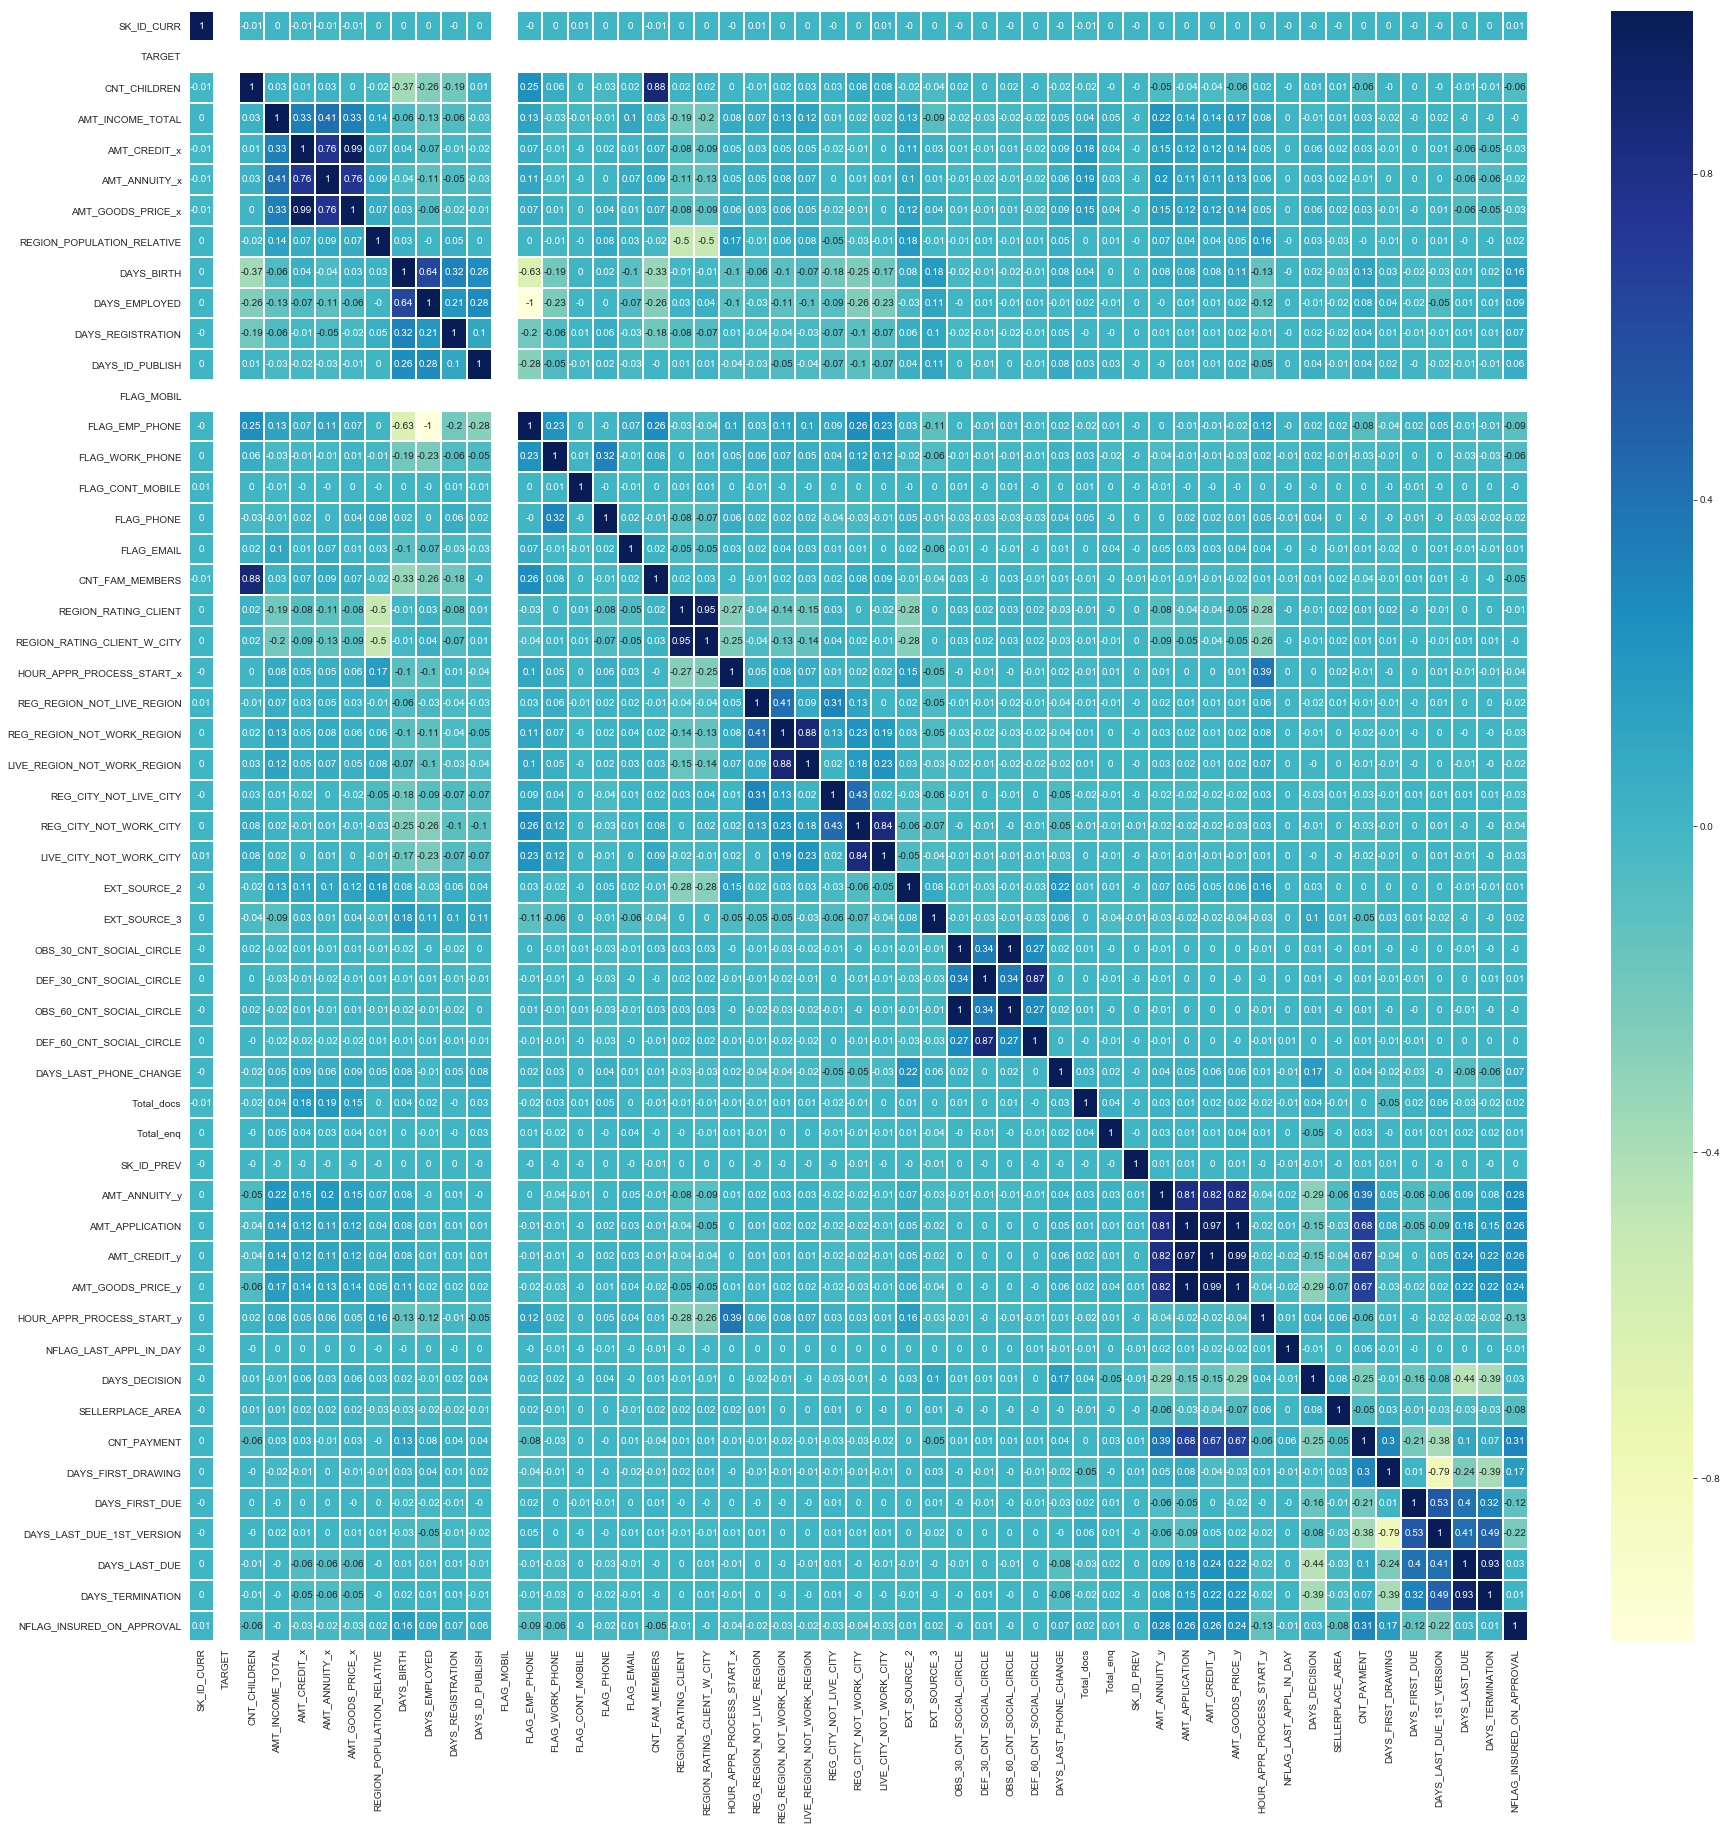

In [692]:
# Find Correlation var for TARGET 0
corr = df_merged_target0.corr().round(2) 
plt.figure(figsize = (30,30))
sns.heatmap(corr, cmap = "YlGnBu", annot = True, linewidth = 1) #correlation map for df_merged_target0

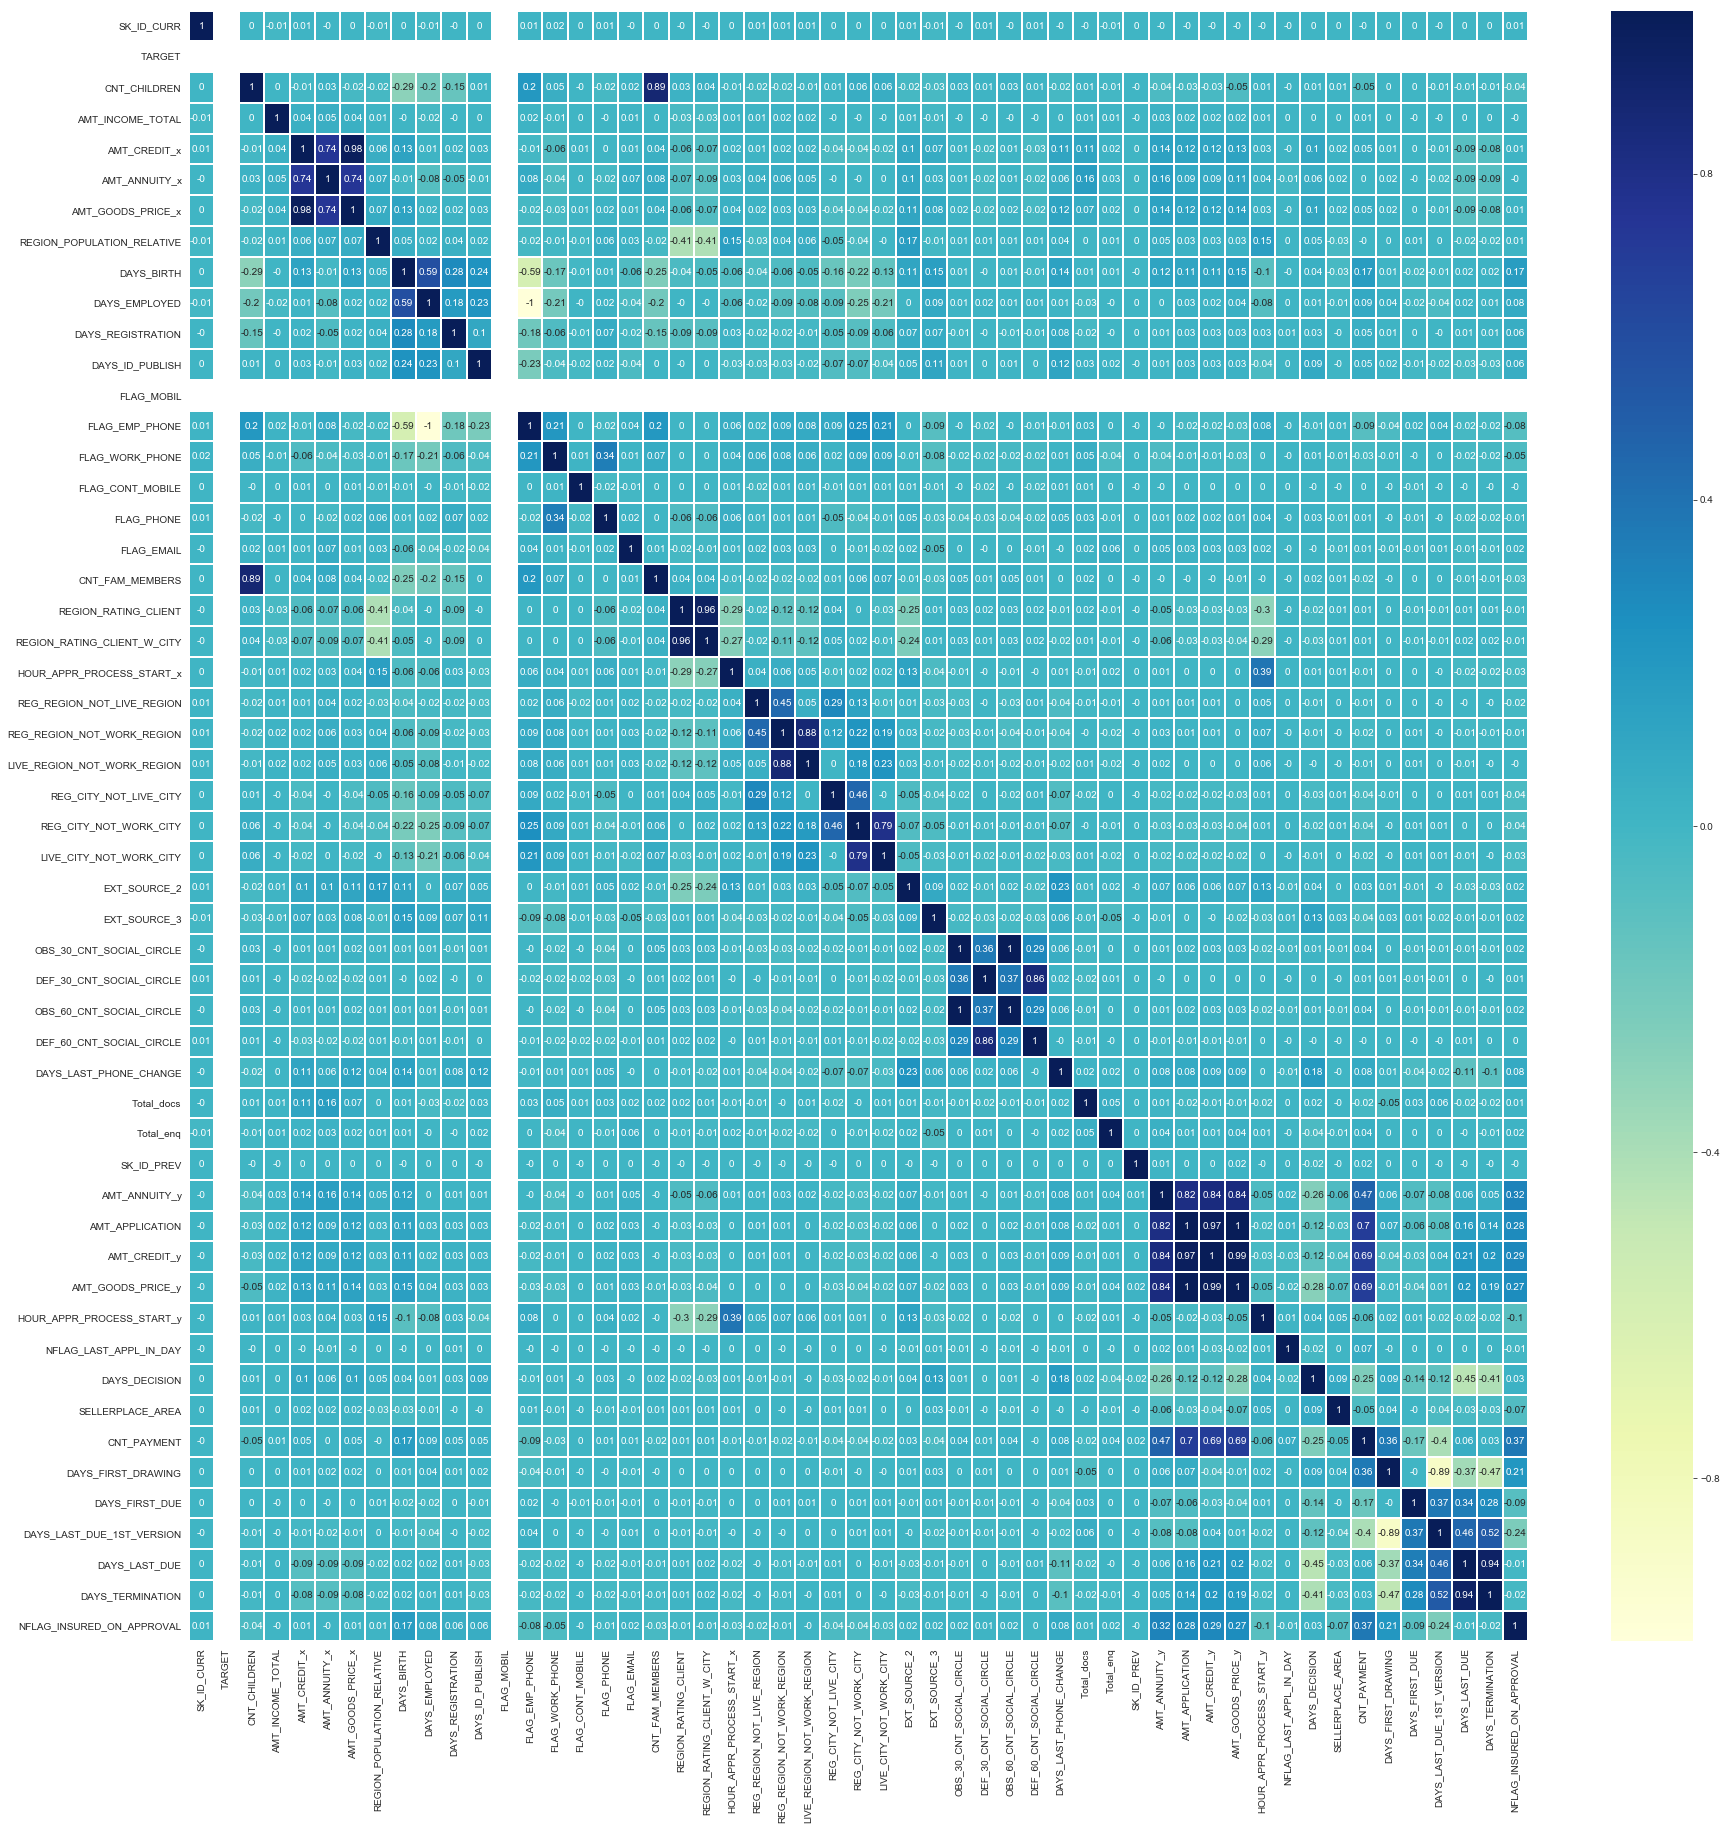

In [693]:
# Find Correlation var for TARGET 1
corr = df_merged_target1.corr().round(2) 
plt.figure(figsize = (30,30))
sns.heatmap(corr, cmap = "YlGnBu", annot = True, linewidth = 1) #correlation map for df_merged_target1

### Below are the Top 10 variables which are correlated. 

#### Obseration: df_merged_target0
- 1. AMT_CREDIT and AMT_GOODS_PRICE (.99)
- 2. AMT_CREDIT and AMT_APPLICATION (.97)
- 3. REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY(.95)
- 4. DAYS_LAST_DUE and DAYS_TERMINATION (.93)
- 5. CNT_FAM_MEMBERS and CNT_CHILDREN(.89)
- 6. REG_REGION_NOT_LIVE_REGION and LIVE_REGION_NOT_WORK_REGION(.88)
- 7. DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE(.87)
- 8. REG_CITY_NOT_WORK_CITY and REG_CITY_NOT_LIVE_CITY(.84)
- 9. AMT_ANNUITY and AMT_GOODS_PRICE(.82)
- 10. AMT_ANNUITY and AMT_CREDIT(.82)
- 11. AMT_ANNUITY and AMT_APPLICATION(.81)

#### Obseration: df_merged_target1

- 1. AMT_CREDIT and AMT_GOODS_PRICE(.99)
- 2. AMT_CREDIT and AMT_APPLICATION(.97)
- 3. REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY(.96)
- 4. DAYS_LAST_DUE and DAYS_TERMINATION(.94)
- 5. CNT_FAM_MEMBERS and CNT_CHILDREN(.89)
- 6. REG_REGION_NOT_LIVE_REGION and LIVE_REGION_NOT_WORK_REGION(.88)
- 7. DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE(.86)
- 8. AMT_ANNUITY and AMT_GOODS_PRICE(.84)
- 9. AMT_ANNUITY and AMT_CREDIT(.84)
- 10. AMT_ANNUITY and AMT_APPLICATION(.82)
- 11. REG_CITY_NOT_WORK_CITY and REG_CITY_NOT_LIVE_CITY(.79)

### Summary : -As we can observe that variable and correlation is almost SAME for Target 0 and Target 1 